In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import torch
# from torch import nn
# import torch.nn.functional as F
# from torch import optim
import sklearn
# from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def DataScaler(data):
    scaler = preprocessing.StandardScaler().fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

In [4]:
# main function
raw_data = pd.read_csv('final_data.csv')
raw_df = pd.DataFrame({"hadm_id": raw_data.hadm_id,
    "gender": raw_data.gender,
    "race": raw_data.race,
    "age": raw_data.age,  
    "atrial_fibrillation": raw_data.atrial_fibrillation,
    "ischemic_stroke": raw_data.ischemic_stroke, 
    "trsnsient_ischemic_attack": raw_data.trsnsient_ischemic_attack,
    "peripheral_arterial_occusive": raw_data.peripheral_arterial_occusive, 
    "myocardial_infarction": raw_data.myocardial_infarction,
    "congestive_heart_failure": raw_data.congestive_heart_failure,
    "hypertension": raw_data.hypertension,
    "diabates_mellitus": raw_data.diabates_mellitus,
    "hyperlipidemia": raw_data.hyperlipidemia,
    "aspirin": raw_data.aspirin,
    "warfarin":raw_data.warfarin,
    "bb": raw_data.bb,
    "heartrate_max": raw_data.heartrate_max,
    "map_min": raw_data.map_min,
    "base_excess_val": raw_data.base_excess_val,
    "ph_val": raw_data.ph_val,
    "hemoglobin_val": raw_data.hemoglobin_val,
    "lactate_val": raw_data.lactate_val,
    "pt_val": raw_data.pt_val,
    "ptt_val": raw_data.ptt_val,
    "inr_val": raw_data.inr_val,
    "urea_nitrogen_val": raw_data.urea_nitrogen_val,
    "creatinine_val": raw_data.creatinine_val,
    "platelet_count_val": raw_data.platelet_count_val,
    "bilirubin_val": raw_data.bilirubin_val,
    "albumin_val": raw_data.albumin_val,
    "varice": raw_data.varice,
    "label": raw_data.trans
})
# change the race and gender into values
raw_df['gender'] = raw_df['gender'].replace(['F'], 1)
raw_df['gender'] = raw_df['gender'].replace(['M'], 0)
raw_df['race'] = raw_df['race'].replace(['WHITE'], 1)
raw_df['race'] = raw_df['race'].replace(['BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO - DOMINICAN',
       'WHITE - OTHER EUROPEAN', 'OTHER', 'ASIAN','UNKNOWN'],0)
raw_df['race'] = raw_df['race'].replace(['ASIAN - CHINESE', 'BLACK/CARIBBEAN ISLAND', 'BLACK/CAPE VERDEAN',
       'ASIAN - SOUTH EAST ASIAN', 'HISPANIC/LATINO - PUERTO RICAN',
       'WHITE - RUSSIAN', 'WHITE - EASTERN EUROPEAN'],0)
raw_df['race'] = raw_df['race'].replace(['PATIENT DECLINED TO ANSWER', 'MULTIPLE RACE/ETHNICITY',
       'HISPANIC/LATINO - HONDURAN', 'UNABLE TO OBTAIN', 'PORTUGUESE',
       'HISPANIC/LATINO - COLUMBIAN', 'HISPANIC OR LATINO'],0)
raw_df['race'] = raw_df['race'].replace(['AMERICAN INDIAN/ALASKA NATIVE', 'BLACK/AFRICAN',
       'WHITE - BRAZILIAN', 'HISPANIC/LATINO - GUATEMALAN',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - MEXICAN',
       'SOUTH AMERICAN'],0)
raw_df['race'] = raw_df['race'].replace(['NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'ASIAN - ASIAN INDIAN', 'ASIAN - KOREAN'],0)
raw_df['gender']=raw_df['gender'].astype(float)
raw_df['race']=raw_df['race'].astype(float)
raw_df

,hadm_id,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,varice,label
0,21080282,1.0,1.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,...,12.6,23.5,1.2,18.0,0.5,182.0,0.4,3.3,0,1
1,24970864,1.0,1.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,25.0,1.6,622.0,0.1,NaN,0,1
2,27196888,0.0,1.0,55.191310,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,29.5,1.2,21.0,0.6,102.0,3.2,2.7,0,1
3,28432198,1.0,1.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,...,12.7,28.0,1.2,13.0,0.6,279.0,NaN,NaN,0,1
4,21765388,0.0,1.0,52.317101,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,28.1,1.2,21.0,1.1,100.0,1.2,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,26927108,1.0,1.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,30.0,0.9,407.0,0.4,NaN,0,0
3287,25399885,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,5.0,0.6,279.0,NaN,3.4,0,0
3288,22194922,0.0,1.0,25.790832,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,26.0,0.8,229.0,0.3,NaN,1,0
3289,22978484,0.0,1.0,67.983994,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,NaN,2.1,13.0,0.6,909.0,0.4,NaN,0,0


In [5]:
# data pre-processing
all_features = list(raw_df)
target = ['label']
features = list(set(all_features)-set(target))
# raw_df.features = DataScaler(raw_df.features)
# raw_df[:,features] = DataScaler(raw_df[:,features])

# fill the binary missing values
raw_df['atrial_fibrillation'] = raw_df['atrial_fibrillation'].fillna(0)
raw_df['ischemic_stroke'] = raw_df['ischemic_stroke'].fillna(0)
raw_df['trsnsient_ischemic_attack'] = raw_df['trsnsient_ischemic_attack'].fillna(0)
raw_df['peripheral_arterial_occusive'] = raw_df['peripheral_arterial_occusive'].fillna(0)
raw_df['myocardial_infarction'] = raw_df['myocardial_infarction'].fillna(0)
raw_df['congestive_heart_failure'] = raw_df['congestive_heart_failure'].fillna(0)
raw_df['hypertension'] = raw_df['hypertension'].fillna(0)
raw_df['diabates_mellitus'] = raw_df['diabates_mellitus'].fillna(0)
raw_df['hyperlipidemia'] = raw_df['hyperlipidemia'].fillna(0)
raw_df['aspirin'] = raw_df['aspirin'].fillna(0)
raw_df['warfarin'] = raw_df['warfarin'].fillna(0)
raw_df['bb'] = raw_df['bb'].fillna(0)

raw_df
# raw_df(raw_df.info())

,hadm_id,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,varice,label
0,21080282,1.0,1.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,...,12.6,23.5,1.2,18.0,0.5,182.0,0.4,3.3,0,1
1,24970864,1.0,1.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,25.0,1.6,622.0,0.1,NaN,0,1
2,27196888,0.0,1.0,55.191310,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,29.5,1.2,21.0,0.6,102.0,3.2,2.7,0,1
3,28432198,1.0,1.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,...,12.7,28.0,1.2,13.0,0.6,279.0,NaN,NaN,0,1
4,21765388,0.0,1.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,28.1,1.2,21.0,1.1,100.0,1.2,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,26927108,1.0,1.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,30.0,0.9,407.0,0.4,NaN,0,0
3287,25399885,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,5.0,0.6,279.0,NaN,3.4,0,0
3288,22194922,0.0,1.0,25.790832,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,26.0,0.8,229.0,0.3,NaN,1,0
3289,22978484,0.0,1.0,67.983994,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,NaN,2.1,13.0,0.6,909.0,0.4,NaN,0,0


In [108]:
# Impute with mean imputation
from sklearn.impute import SimpleImputer
df = raw_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df['heartrate_max'] = mean_imputer.fit_transform(df['heartrate_max'].values.reshape(-1,1))
df['map_min'] = mean_imputer.fit_transform(df['map_min'].values.reshape(-1,1))
df['base_excess_val'] = mean_imputer.fit_transform(df['base_excess_val'].values.reshape(-1,1))
df['ph_val'] = mean_imputer.fit_transform(df['ph_val'].values.reshape(-1,1))
df['hemoglobin_val'] = mean_imputer.fit_transform(df['hemoglobin_val'].values.reshape(-1,1))
df['lactate_val'] = mean_imputer.fit_transform(df['lactate_val'].values.reshape(-1,1))
df['pt_val'] = mean_imputer.fit_transform(df['pt_val'].values.reshape(-1,1))
df['ptt_val'] = mean_imputer.fit_transform(df['ptt_val'].values.reshape(-1,1))
df['inr_val'] = mean_imputer.fit_transform(df['inr_val'].values.reshape(-1,1))
df['urea_nitrogen_val'] = mean_imputer.fit_transform(df['urea_nitrogen_val'].values.reshape(-1,1))
df['creatinine_val'] = mean_imputer.fit_transform(df['creatinine_val'].values.reshape(-1,1))
df['platelet_count_val'] = mean_imputer.fit_transform(df['platelet_count_val'].values.reshape(-1,1))
df['bilirubin_val'] = mean_imputer.fit_transform(df['bilirubin_val'].values.reshape(-1,1))
df['albumin_val'] = mean_imputer.fit_transform(df['albumin_val'].values.reshape(-1,1))
df

,hadm_id,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,varice,label
0,21080282,1.0,1.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,...,12.600000,23.500000,1.200000,18.0,0.5,182.0,0.400000,3.30000,0,1
1,24970864,1.0,1.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,...,16.162652,34.298953,1.499209,25.0,1.6,622.0,0.100000,3.20387,0,1
2,27196888,0.0,1.0,55.191310,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,29.500000,1.200000,21.0,0.6,102.0,3.200000,2.70000,0,1
3,28432198,1.0,1.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,...,12.700000,28.000000,1.200000,13.0,0.6,279.0,1.521564,3.20387,0,1
4,21765388,0.0,1.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,28.100000,1.200000,21.0,1.1,100.0,1.200000,3.20387,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,26927108,1.0,1.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,...,16.162652,34.298953,1.499209,30.0,0.9,407.0,0.400000,3.20387,0,0
3287,25399885,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,...,16.162652,34.298953,1.499209,5.0,0.6,279.0,1.521564,3.40000,0,0
3288,22194922,0.0,1.0,25.790832,0.0,0.0,0.0,0.0,0.0,0.0,...,16.162652,34.298953,1.499209,26.0,0.8,229.0,0.300000,3.20387,1,0
3289,22978484,0.0,1.0,67.983994,0.0,0.0,0.0,0.0,0.0,0.0,...,23.000000,34.298953,2.100000,13.0,0.6,909.0,0.400000,3.20387,0,0


In [109]:
# reduce the dtype
df = df.astype('float32')
# df = df.iloc[:, 1:]

In [110]:
df.head()

,hadm_id,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,varice,label
0,21080282.0,1.0,1.0,50.681782,0.0,0.0,0.0,0.0,0.0,0.0,...,12.600000,23.500000,1.200000,18.0,0.5,182.0,0.400000,3.30000,0.0,1.0
1,24970864.0,1.0,1.0,66.859550,0.0,0.0,0.0,0.0,0.0,0.0,...,16.162651,34.298954,1.499209,25.0,1.6,622.0,0.100000,3.20387,0.0,1.0
2,27196888.0,0.0,1.0,55.191311,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,29.500000,1.200000,21.0,0.6,102.0,3.200000,2.70000,0.0,1.0
3,28432198.0,1.0,1.0,34.918964,0.0,0.0,0.0,0.0,0.0,0.0,...,12.700000,28.000000,1.200000,13.0,0.6,279.0,1.521564,3.20387,0.0,1.0
4,21765388.0,0.0,1.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,28.100000,1.200000,21.0,1.1,100.0,1.200000,3.20387,0.0,1.0


In [111]:
train_data = df.sample(2500)
test_data = df.drop(train_data.index)
x_train = train_data.drop(target,axis=1)
y_train = train_data.loc[:,'label']
x_valid = test_data.drop(target,axis=1)
y_valid = test_data.loc[:,'label']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)

In [112]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_valid)
score=accuracy_score(y_pred,y_valid)
score

0.7964601769911505

In [114]:
from sklearn.metrics import roc_curve
y_pred_proba=model.predict_proba(x_valid)
y_pred_proba[:,1] #想看输血分类为1的概率
fpr,tpr,thres=roc_curve(y_valid,y_pred_proba[:,1])


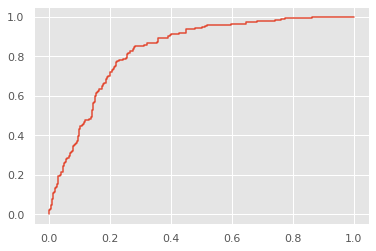

In [115]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

Text(30.5, 0.5, 'True')

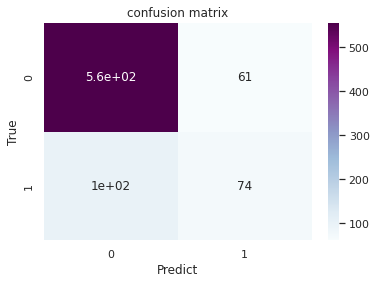

In [116]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sn.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_valid, y_pred, labels=[0, 1])
sn.heatmap(C2,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [117]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid,y_pred_proba[:,1])



0.8315728683470259

In [118]:
# save state dict
saved_filename = model.save_model('xgboost_model_1')

In [119]:
fpr

array([0.        , 0.        , 0.        , 0.00162075, 0.00162075,
       0.00486224, 0.00486224, 0.00648298, 0.00648298, 0.00810373,
       0.00810373, 0.00972447, 0.00972447, 0.01134522, 0.01134522,
       0.01458671, 0.01458671, 0.0178282 , 0.0178282 , 0.01944895,
       0.01944895, 0.02269044, 0.02269044, 0.02431118, 0.02431118,
       0.02593193, 0.02593193, 0.02917342, 0.02917342, 0.0356564 ,
       0.0356564 , 0.03889789, 0.03889789, 0.04376013, 0.04376013,
       0.04538088, 0.04538088, 0.04862237, 0.04862237, 0.05186386,
       0.05186386, 0.0534846 , 0.0534846 , 0.05834684, 0.05834684,
       0.06482982, 0.06482982, 0.06645057, 0.06645057, 0.06807131,
       0.06807131, 0.07293355, 0.07293355, 0.07617504, 0.07617504,
       0.07941653, 0.07941653, 0.08265802, 0.08265802, 0.08427877,
       0.08427877, 0.089141  , 0.089141  , 0.09076175, 0.09076175,
       0.09400324, 0.09400324, 0.09724473, 0.09724473, 0.09886548,
       0.09886548, 0.10048622, 0.10048622, 0.10696921, 0.10696

In [120]:
1-fpr

array([1.        , 1.        , 1.        , 0.99837925, 0.99837925,
       0.99513776, 0.99513776, 0.99351702, 0.99351702, 0.99189627,
       0.99189627, 0.99027553, 0.99027553, 0.98865478, 0.98865478,
       0.98541329, 0.98541329, 0.9821718 , 0.9821718 , 0.98055105,
       0.98055105, 0.97730956, 0.97730956, 0.97568882, 0.97568882,
       0.97406807, 0.97406807, 0.97082658, 0.97082658, 0.9643436 ,
       0.9643436 , 0.96110211, 0.96110211, 0.95623987, 0.95623987,
       0.95461912, 0.95461912, 0.95137763, 0.95137763, 0.94813614,
       0.94813614, 0.9465154 , 0.9465154 , 0.94165316, 0.94165316,
       0.93517018, 0.93517018, 0.93354943, 0.93354943, 0.93192869,
       0.93192869, 0.92706645, 0.92706645, 0.92382496, 0.92382496,
       0.92058347, 0.92058347, 0.91734198, 0.91734198, 0.91572123,
       0.91572123, 0.910859  , 0.910859  , 0.90923825, 0.90923825,
       0.90599676, 0.90599676, 0.90275527, 0.90275527, 0.90113452,
       0.90113452, 0.89951378, 0.89951378, 0.89303079, 0.89303

In [121]:
tpr

array([0.        , 0.00574713, 0.02298851, 0.02298851, 0.02873563,
       0.02873563, 0.04022989, 0.04022989, 0.04597701, 0.04597701,
       0.07471264, 0.07471264, 0.08045977, 0.08045977, 0.1091954 ,
       0.1091954 , 0.11494253, 0.11494253, 0.12068966, 0.12068966,
       0.13218391, 0.13218391, 0.13793103, 0.13793103, 0.14942529,
       0.14942529, 0.15517241, 0.15517241, 0.1954023 , 0.1954023 ,
       0.20114943, 0.20114943, 0.21264368, 0.21264368, 0.23563218,
       0.23563218, 0.24712644, 0.24712644, 0.25862069, 0.25862069,
       0.26436782, 0.26436782, 0.2816092 , 0.2816092 , 0.28735632,
       0.28735632, 0.29310345, 0.29310345, 0.3045977 , 0.3045977 ,
       0.31034483, 0.31034483, 0.31609195, 0.31609195, 0.32183908,
       0.32183908, 0.34482759, 0.34482759, 0.35057471, 0.35057471,
       0.35632184, 0.35632184, 0.36206897, 0.36206897, 0.37356322,
       0.37356322, 0.39655172, 0.39655172, 0.42528736, 0.42528736,
       0.43103448, 0.43103448, 0.44827586, 0.44827586, 0.45402

In [122]:
thres

array([1.99684322e+00, 9.96843219e-01, 9.94574726e-01, 9.94159698e-01,
       9.93680477e-01, 9.92263436e-01, 9.91351485e-01, 9.90804434e-01,
       9.88318920e-01, 9.86823201e-01, 9.76398110e-01, 9.75179911e-01,
       9.74237442e-01, 9.73950088e-01, 9.64328289e-01, 9.63240147e-01,
       9.61396337e-01, 9.49166715e-01, 9.48897958e-01, 9.48084056e-01,
       9.44929719e-01, 9.40566123e-01, 9.37990010e-01, 9.37463164e-01,
       9.31067169e-01, 9.28215683e-01, 9.26938295e-01, 9.24979329e-01,
       9.14136648e-01, 9.09099281e-01, 9.04998660e-01, 9.00509417e-01,
       8.90113175e-01, 8.77286494e-01, 8.51522267e-01, 8.49514484e-01,
       8.40444863e-01, 8.25621605e-01, 8.15646529e-01, 8.07549655e-01,
       8.02269220e-01, 7.99928427e-01, 7.77489603e-01, 7.69249558e-01,
       7.60221303e-01, 7.46328712e-01, 7.44525790e-01, 7.41582930e-01,
       7.28165567e-01, 7.13886321e-01, 6.96076512e-01, 6.86731279e-01,
       6.81369066e-01, 6.55454934e-01, 6.48727238e-01, 6.44440830e-01,
      

In [123]:
C2

array([[556,  61],
       [100,  74]])

In [125]:
92 / (105+92)

0.467005076142132

In [126]:
y_threshold = 1.24314358e-03

In [127]:
y_pred_proba=model.predict_proba(x_valid)
# y_pred_proba[:,1] #想看输血分类为1的概率

In [128]:
y_pred_thres = (y_pred_proba[:,1]>=y_threshold).astype(int)

In [129]:
# y_pred_thres

In [130]:
cm

array([[119, 475],
       [  1, 196]])

In [131]:
NPV

0.9916666666666667

In [132]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

In [133]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [134]:
NPV

0.9916666666666667

In [135]:
TPR

0.9949238578680203

In [136]:
tn, fp, fn, tp = cm.ravel()

In [137]:
tn / (tn + fn)

0.9916666666666667

In [138]:
df.columns

Index(['hadm_id', 'gender', 'race', 'age', 'atrial_fibrillation',
       'ischemic_stroke', 'trsnsient_ischemic_attack',
       'peripheral_arterial_occusive', 'myocardial_infarction',
       'congestive_heart_failure', 'hypertension', 'diabates_mellitus',
       'hyperlipidemia', 'aspirin', 'warfarin', 'bb', 'heartrate_max',
       'map_min', 'base_excess_val', 'ph_val', 'hemoglobin_val', 'lactate_val',
       'pt_val', 'ptt_val', 'inr_val', 'urea_nitrogen_val', 'creatinine_val',
       'platelet_count_val', 'bilirubin_val', 'albumin_val', 'varice',
       'label'],
      dtype='object')

In [139]:
feature_list = ['gender', 'race', 'age', 'atrial_fibrillation',
       'ischemic_stroke', 'trsnsient_ischemic_attack',
       'peripheral_arterial_occusive', 'myocardial_infarction',
       'congestive_heart_failure', 'hypertension', 'diabates_mellitus',
       'hyperlipidemia', 'aspirin', 'warfarin', 'bb', 'heartrate_max',
       'map_min', 'base_excess_val', 'ph_val', 'hemoglobin_val', 'lactate_val',
       'pt_val', 'ptt_val', 'inr_val', 'urea_nitrogen_val', 'creatinine_val',
       'platelet_count_val', 'bilirubin_val', 'albumin_val', 'varice']

In [140]:
importances = list(model.feature_importances_)

# Dictionaries with variable and importance
feature_importances = {feature:round(importance, 2) for feature, importance in zip(feature_list, importances)}

# Sort the feature importances in decreasing order
feature_importances = sorted(feature_importances.items(), key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: hemoglobin_val       Importance: 0.11999999731779099
Variable: base_excess_val      Importance: 0.07999999821186066
Variable: pt_val               Importance: 0.05999999865889549
Variable: varice               Importance: 0.05999999865889549
Variable: ph_val               Importance: 0.05000000074505806
Variable: lactate_val          Importance: 0.05000000074505806
Variable: ischemic_stroke      Importance: 0.03999999910593033
Variable: hyperlipidemia       Importance: 0.03999999910593033
Variable: map_min              Importance: 0.03999999910593033
Variable: creatinine_val       Importance: 0.03999999910593033
Variable: race                 Importance: 0.029999999329447746
Variable: atrial_fibrillation  Importance: 0.029999999329447746
Variable: congestive_heart_failure Importance: 0.029999999329447746
Variable: diabates_mellitus    Importance: 0.029999999329447746
Variable: aspirin              Importance: 0.029999999329447746
Variable: ptt_val              Importance: 0.0

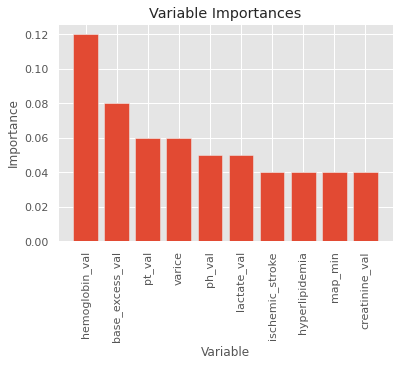

In [150]:
plt.style.use('ggplot')

top = 10
# the x axis for the plot 
x_axis = [i for i in range(top)]
plot_importance = feature_importances[:top]

# Creat a bar plot 
plt.bar(x_axis, [i[1] for i in plot_importance], orientation = 'vertical')
# Define xtick labels 
plt.xticks(x_axis, [i[0] for i in plot_importance], rotation='vertical')
# Define axis labels and titles
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [103]:
len(importances)

30

In [151]:
feature_importances

[('hemoglobin_val', 0.12),
 ('base_excess_val', 0.08),
 ('pt_val', 0.06),
 ('varice', 0.06),
 ('ph_val', 0.05),
 ('lactate_val', 0.05),
 ('ischemic_stroke', 0.04),
 ('hyperlipidemia', 0.04),
 ('map_min', 0.04),
 ('creatinine_val', 0.04),
 ('race', 0.03),
 ('atrial_fibrillation', 0.03),
 ('congestive_heart_failure', 0.03),
 ('diabates_mellitus', 0.03),
 ('aspirin', 0.03),
 ('ptt_val', 0.03),
 ('inr_val', 0.03),
 ('platelet_count_val', 0.03),
 ('bilirubin_val', 0.03),
 ('albumin_val', 0.03),
 ('gender', 0.02),
 ('age', 0.02),
 ('urea_nitrogen_val', 0.02),
 ('trsnsient_ischemic_attack', 0.01),
 ('hypertension', 0.01),
 ('peripheral_arterial_occusive', 0.0),
 ('myocardial_infarction', 0.0),
 ('warfarin', 0.0),
 ('bb', 0.0),
 ('heartrate_max', 0.0)]